### Importación de datos



In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [17]:
from matplotlib import pyplot as plt
import numpy as np

#1. Análisis de facturación



In [18]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
lista_ingresos_totales = [t['Precio'].sum() for t in tiendas]

print(lista_ingresos_totales)

[np.float64(1150880400.0), np.float64(1116343500.0), np.float64(1098019600.0), np.float64(1038375700.0)]


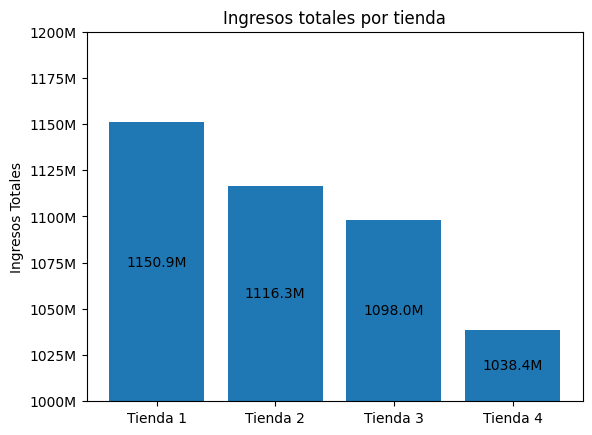

In [19]:
def formato_numero(x, pos):
  return f'{x / 1e6:.0f}M'

plt.figure()
p = plt.bar(nombres_tiendas, height= lista_ingresos_totales)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formato_numero))
plt.ylim(1.0e9, 1.2e9)
plt.title('Ingresos totales por tienda')
plt.ylabel('Ingresos Totales')
plt.bar_label(p, label_type='center', labels=[f'{i/1e6:.1f}M' for i in lista_ingresos_totales])
plt.show()

# 2. Ventas por categoría

In [20]:
ventas = [t['Categoría del Producto'].value_counts() for t in tiendas]

print(ventas)

[Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes            

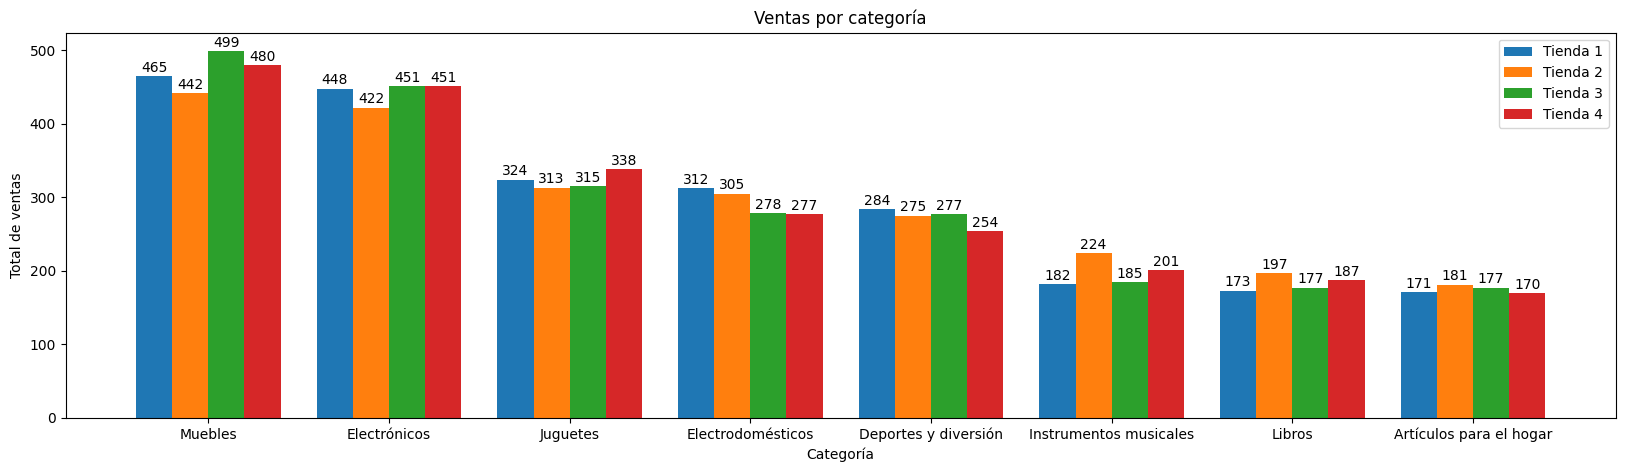

In [29]:
fig, ax = plt.subplots(figsize=(20,5))

x = np.arange(len(ventas[0]))
labels = list(ventas[0].keys())
width = 0.2


bart1 = ax.bar(x - 3*width / 2, ventas[0], width, label='Tienda 1')
bart2 = ax.bar(x - width / 2, ventas[1], width, label='Tienda 2')
bart3 = ax.bar(x + width / 2, ventas[2], width, label='Tienda 3')
bart4 = ax.bar(x + 3*width / 2, ventas[3], width, label='Tienda 4')

ax.bar_label(bart1, padding=1)
ax.bar_label(bart2, padding=1)
ax.bar_label(bart3, padding=1)
ax.bar_label(bart4, padding=1)


ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Total de ventas')
ax.set_title('Ventas por categoría')
ax.set_xlabel('Categoría')
ax.legend()

# 3. Calificación promedio de la tienda


In [22]:
calificacion_promedia = [t['Calificación'].mean() for t in tiendas]

print(calificacion_promedia)

[np.float64(3.976685036032217), np.float64(4.037303942348453), np.float64(4.048325561678677), np.float64(3.9957591178965224)]


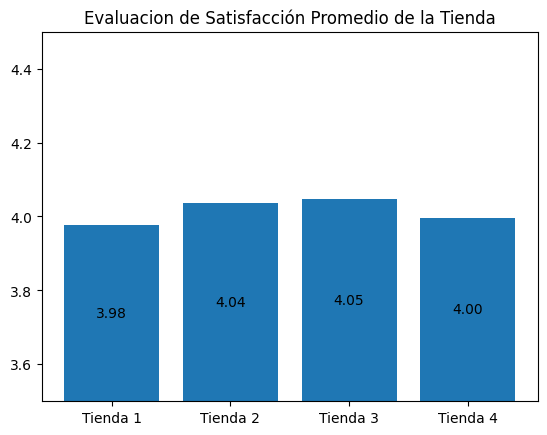

In [30]:
plt.figure()
p = plt.bar(nombres_tiendas, height= calificacion_promedia)
plt.ylim(3.5, 4.5)
plt.bar_label(p, label_type='center', labels= [f'{i:.2f}' for i in calificacion_promedia])
plt.title('Evaluacion de Satisfacción Promedio de la Tienda')
plt.show()

# 4. Productos más y menos vendidos

In [24]:
productos_vendidos = [t['Producto'].value_counts() for t in tiendas]

print(productos_vendidos)

[Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV                       44
Cama king                      44
Cubo

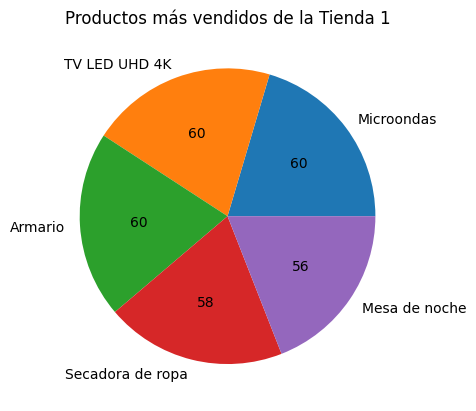

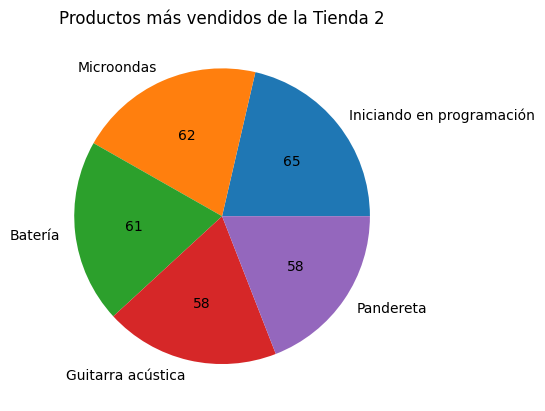

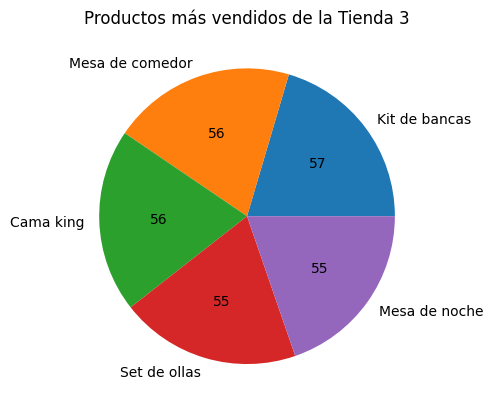

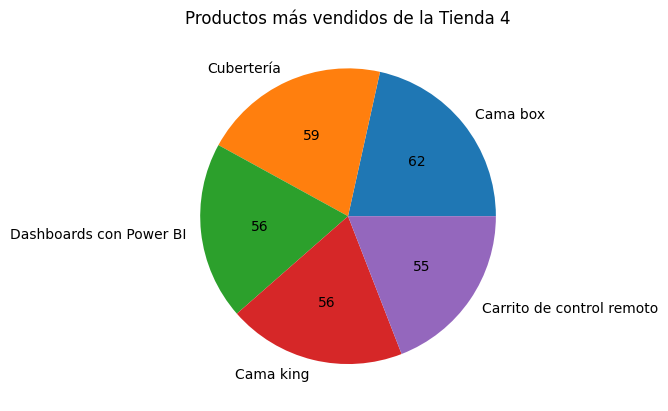

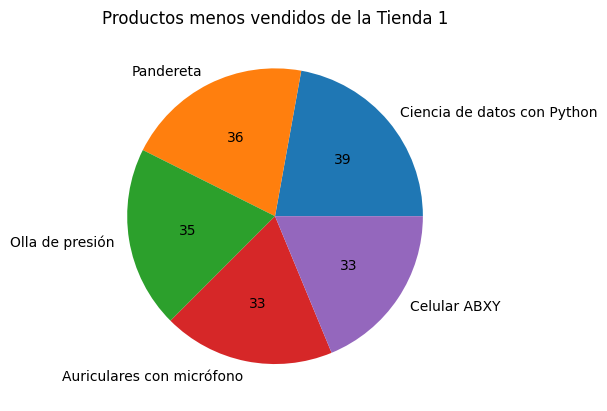

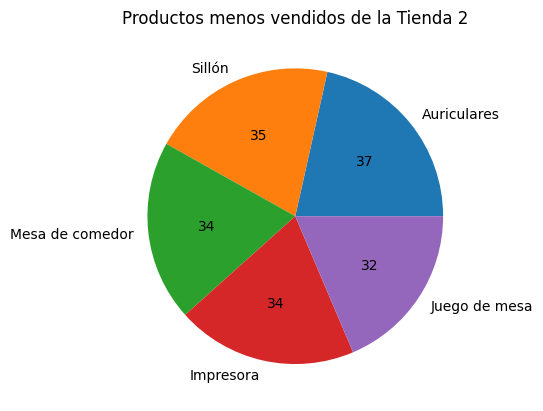

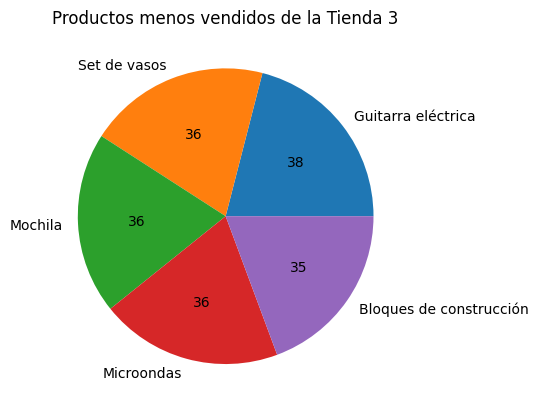

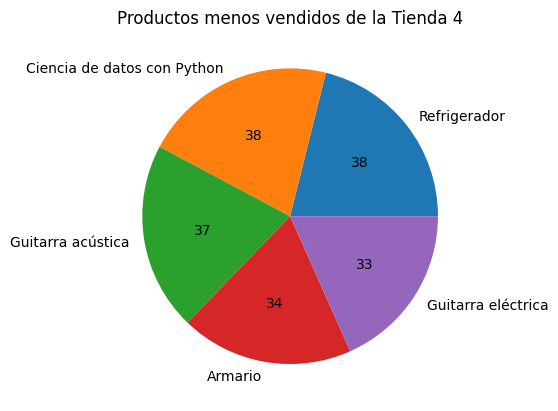

In [25]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format


cont_tienda = 0
for t in productos_vendidos:
  cont_tienda += 1
  fig, ax = plt.subplots()
  ax.pie(t[:5],labels=t[:5].keys(),autopct=autopct_format(t[:5].values))
  ax.set_title(f'Productos más vendidos de la Tienda {cont_tienda}')

cont_tienda = 0
for t in productos_vendidos:
  cont_tienda += 1
  fig, ax = plt.subplots()
  ax.pie(t[-5:],labels=t[-5:].keys(),autopct=autopct_format(t[-5:].values))
  ax.set_title(f'Productos menos vendidos de la Tienda {cont_tienda}')

plt.show()

# 5. Envío promedio por tienda

In [26]:
envio_promedio = [t['Costo de envío'].mean() for t in tiendas]

print(envio_promedio)

[np.float64(26018.60958033065), np.float64(25216.235693090293), np.float64(24805.680373039424), np.float64(23459.457167090754)]


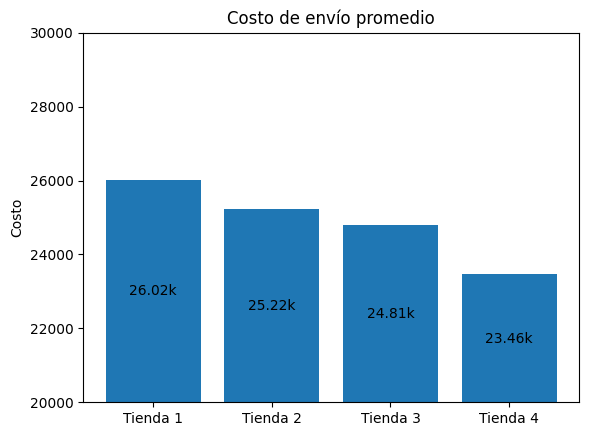

In [27]:
plt.figure()
p = plt.bar(nombres_tiendas, envio_promedio)
plt.bar_label(p, label_type='center', labels= [f'{i/1e3:.2f}k' for i in envio_promedio])
plt.ylabel('Costo')
plt.title('Costo de envío promedio')
plt.ylim(20e3,30e3)
plt.show()

**Informe Final de Análisis de Tiendas**

A continuación, se presenta un análisis comparativo de las cuatro tiendas basado en los siguientes criterios:

**1. Ingresos totales de las tiendas:**

Según el gráfico de "Ingresos totales por tienda", la Tienda 1 generó los mayores ingresos totales con **1.15 mil millones**, seguida por la Tienda 2 con **1.12 mil millones**, Tienda 3 con **1.10 mil millones** y la **Tienda 4** con **1.04 mil millones**.

**2. Categorías de productos más y menos vendidas:**

El gráfico de barras apiladas muestra las ventas por categoría para cada tienda. En general, las categorías "Muebles" y "Electrónicos" son las más vendidas en todas las tiendas, mientras que "Instrumentos musicales" y "Artículos para el hogar" tienden a ser las menos vendidas. La distribución exacta varía ligeramente entre tiendas, pero la tendencia general se mantiene.

**3. Calificaciones promedio de los clientes por tienda:**

El gráfico de "Evaluación Promedio de la Tienda" indica que la Tienda 3 tiene la calificación promedio más alta con **4.05**, seguida de cerca por la Ti2 con **4.04**, Tienda 4 con **4.00** y la **Tienda 1** con **3.98**.

**4. Productos más y menos vendidos:**

Los gráficos circulares para cada tienda detallan los 5 productos más y menos vendidos con sus respectivas cantidades. Los productos específicos varían entre tiendas, pero se observa una diversidad en los productos que lideran y cierran las ventas en cada ubicación.

**5. Coste de envío promedio para cada tienda:**

El gráfico de "Costo de envío promedio" muestra que la **Tienda 4** tiene el costo de envío promedio más bajo con **23.46 mil**, mientras que la **Tienda 1** tiene el más alto con **26.02 mil**. La Tienda 2 tiene un costo promedio de **25.22 mil** y la Tienda 3 de **24.81 mil**.

**Conclusión sobre la tienda con menor desempeño para vender:**

Basándonos en los **ingresos totales**, que es un indicador fundamental del volumen de ventas, la **Tienda 4** presenta el menor desempeño con **1.04 mil millones** en ingresos totales. Aunque tiene el costo de envío promedio más bajo, sus ingresos son significativamente menores en comparación con las otras tiendas. La Tienda 1 tiene la calificación promedio más baja, pero sus ingresos son los más altos.

Considerando la generación de ingresos como el principal indicador de desempeño para vender, la **Tienda 4** es la que muestra el menor desempeño en este conjunto de datos.